# Creazione di una rete neurale definendo manualmente la connessione tra i diveri layer: esempi

In [37]:
import torch
import torch.nn as nn
from torch.optim import SGD

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
    

loss_func = nn.MSELoss()
    
torch.manual_seed(0)
mynet = MyNeuralNet().to(device)

#for par in mynet.parameters():
#    print(par)


In [38]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float().to(device)
Y = torch.tensor(y).float().to(device)

In [39]:
#_call_impl(self, *input, **kwargs)
_Y = mynet(X)
loss_value = loss_func(_Y, Y)
print(loss_value)

tensor(132.0424, device='mps:0', grad_fn=<MseLossBackward0>)


In [40]:
opt = SGD(mynet.parameters(), 0.001)

loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
    
#print(loss_history)

Text(0, 0.5, 'loss')

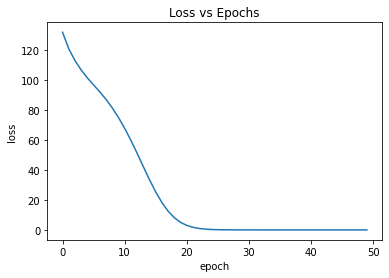

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_history)
plt.title('Loss vs Epochs')
plt.xlabel('epoch')
plt.ylabel('loss')

In [51]:
from torch.utils.data import Dataset, DataLoader
import time

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    

#XDS = torch.tensor(x).float().to(device)
#YDS = torch.tensor(y).float().to(device)

ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
opt = SGD(mynet.parameters(), lr=0.001)

loss_history_ds = []
start = time.time()
for _ in range(50):
    for data in dl:
        X, Y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(X), Y)
        loss_value.backward()
        opt.step()
        loss_history_ds.append(loss_value.item())
        
end = time.time()
print(end-start)
print(x)

0.31792116165161133
[[1, 2], [3, 4], [5, 6], [7, 8]]


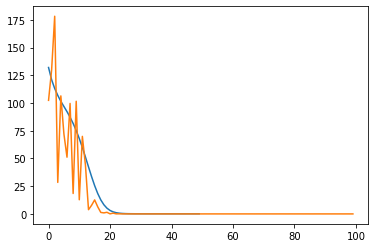

In [52]:
plt.plot(loss_history)
plt.plot(loss_history_ds)

In [59]:
val_x = [[100,11]]

VAL_X = torch.tensor(val_x).float().to(device)
VAL_Y = mynet(VAL_X)

print(VAL_Y)

tensor([[155.4813]], device='mps:0', grad_fn=<LinearBackward0>)


In [62]:
input_to_hidden = mynet.input_to_hidden_layer(X)
hidden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(X, hidden_activation, input_to_hidden)


tensor([[7., 8.],
        [1., 2.]], device='mps:0') tensor([[ 1.8033,  0.0000,  0.0000,  0.0000, 12.6869,  0.0000,  0.0000,  0.0000],
        [ 0.4953,  0.0000,  0.0000,  0.0000,  2.7123,  0.0000,  0.0000,  0.0000]],
       device='mps:0', grad_fn=<ReluBackward0>) tensor([[ 1.8033e+00, -5.0860e+00, -3.8341e+00, -9.1785e+00,  1.2687e+01,
         -1.9242e+00, -5.5779e+00, -4.5948e-01],
        [ 4.9528e-01, -1.0593e+00, -1.2036e+00, -1.4056e+00,  2.7123e+00,
         -2.3804e-02, -1.1027e+00, -8.1152e-05]], device='mps:0',
       grad_fn=<LinearBackward0>)
